In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [ ]:
in_usa = release_dates.country == "USA"
is_christmas = release_dates.title.str.contains("Christmas")
months = release_dates.date.dt.month
months[in_usa & is_christmas].value_counts().plot(kind='bar')


### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [ ]:
in_usa = release_dates.country == "USA"
months = release_dates.date.dt.month
months[in_usa].value_counts().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

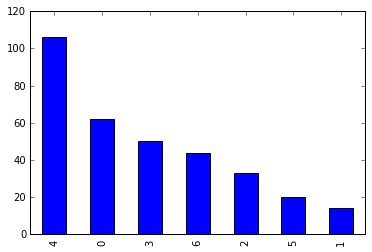

In [6]:
daysofweek = release_dates.date.dt.dayofweek
is_romance = release_dates['title'].str.contains("Romance")
daysofweek[is_romance].value_counts().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

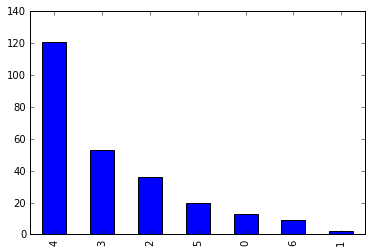

In [7]:
daysofweek = release_dates.date.dt.dayofweek
is_action = release_dates['title'].str.contains("Action")
daysofweek[is_action].value_counts().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [28]:
is_jdench = cast['name'] == "Judi Dench"
jdench_df = cast[is_jdench]
in_usa = release_dates['country'] == "USA"
usa_df = release_dates[in_usa]
df_merge = pd.merge(jdench_df, usa_df, on=['title', 'year'])
in_1990s = df_merge.year // 10 == 199
df_merge.loc[in_1990s, ['title', 'date']]

,title,date
7,GoldenEye,1995-11-17
8,Hamlet,1996-12-25
13,Jack & Sarah,1996-03-22
17,Mrs Brown,1997-10-03
26,Shakespeare in Love,1999-01-08
29,Tea with Mussolini,1999-05-14
35,The World Is Not Enough,1999-11-19
36,Tomorrow Never Dies,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

In [34]:
is_jdench = cast['name'] == "Judi Dench"
jdench_df = cast[is_jdench]
in_usa = release_dates.country == "USA"
usa_df = release_dates[in_usa]
merge_df = pd.merge(jdench_df, usa_df, on=['title', 'year'])
merge_df['date'].dt.month

0      2
1      6
2      8
3     11
4      1
5     11
6      2
7     11
8     12
9     11
10     4
11     3
12    11
13     3
14     4
15     5
16     9
17    10
18     2
19    12
20    12
21     1
22    11
23     5
24    11
25    11
26     1
27    11
28    11
29     5
30     5
31     6
32     6
33     3
34     1
35    11
36    12
37     7
38     7
Name: date, dtype: int64

### In which months do films with Tom Cruise tend to be released in the USA?

In [37]:
is_jdench = cast['name'] == "Tom Cruise"
jdench_df = cast[is_jdench]
in_usa = release_dates.country == "USA"
usa_df = release_dates[in_usa]
merge_df = pd.merge(jdench_df, usa_df, on=['title', 'year'])
merge_df['date'].dt.month.value_counts()

12    10
6      8
7      6
5      5
11     3
10     3
8      3
4      3
1      3
3      1
Name: date, dtype: int64